In [43]:
# %pip install graphviz
# %pip install pydotplus
# %pip install heamy
# %pip install mlxtend
# %pip install git+https://github.com/kvoyager/GmdhPy.git

  Cloning https://github.com/kvoyager/GmdhPy.git to c:\users\notebook\appdata\local\temp\pip-req-build-ik9x4ep7
  Resolved https://github.com/kvoyager/GmdhPy.git to commit f92c0abcf35fb2e0d7fd224b0266cd11fb2fedf3
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for GmdhPy: started
  Running setup.py install for GmdhPy: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/kvoyager/GmdhPy.git 'C:\Users\Notebook\AppData\Local\Temp\pip-req-build-ik9x4ep7'
  DEPRECATION: GmdhPy is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: C:\Users\Notebook\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, LeaveOneOut, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score ,recall_score, precision_score
from IPython.core.display import HTML
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_text
%matplotlib inline 
sns.set(style="ticks")
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.core.display import HTML
from sklearn.tree import export_text, DecisionTreeRegressor
from IPython.display import Image
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor, BaggingRegressor

from IPython.display import Image
import graphviz
import pydotplus
from io import StringIO
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_classification
from gmdhpy import gmdh
from heamy.estimator import Regressor, Classifier
from heamy.pipeline import ModelsPipeline
from heamy.dataset import Dataset

In [3]:
dataset = pd.read_csv('./diamonds.csv')
dataset.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


In [5]:
dataset.cut.replace("b'Fair'",1,inplace=True)
dataset.cut.replace("b'Good'",2,inplace=True)
dataset.cut.replace("b'Very Good'",3,inplace=True)
dataset.cut.replace("b'Ideal'",4,inplace=True)
dataset.cut.replace("b'Premium'",5,inplace=True)
dataset.clarity.replace("b'I1'",1,inplace=True)
dataset.clarity.replace("b'IF'",2,inplace=True)
dataset.clarity.replace("b'SI1'",3,inplace=True)
dataset.clarity.replace("b'SI2'",4,inplace=True)
dataset.clarity.replace("b'VS1'",5,inplace=True)
dataset.clarity.replace("b'VS2'",6,inplace=True)
dataset.clarity.replace("b'VVS1'",7,inplace=True)
dataset.clarity.replace("b'VVS2'",8,inplace=True)
dataset.color.replace("b'J'",1,inplace=True)
dataset.color.replace("b'I'",2,inplace=True)
dataset.color.replace("b'H'",3,inplace=True)
dataset.color.replace("b'G'",4,inplace=True)
dataset.color.replace("b'F'",5,inplace=True)
dataset.color.replace("b'E'",6,inplace=True)
dataset.color.replace("b'D'",7,inplace=True)

In [6]:
shuffled = dataset.sample(frac=1)
shuffled = shuffled[:5000]
shuffled.shape
data_x = shuffled.iloc[:, [0,1,2,3,4,5,7,8,9]].values
data_y = shuffled.iloc[:, 6].values
data_x

array([[0.26, 2.  , 5.  , ..., 4.06, 4.03, 2.59],
       [1.51, 5.  , 6.  , ..., 7.57, 7.51, 4.47],
       [0.3 , 4.  , 5.  , ..., 4.27, 4.31, 2.69],
       ...,
       [0.75, 4.  , 7.  , ..., 5.85, 5.89, 3.6 ],
       [0.5 , 2.  , 7.  , ..., 5.04, 5.02, 3.22],
       [0.8 , 4.  , 3.  , ..., 5.97, 5.95, 3.72]])

In [7]:
data_y

array([ 679., 8135.,  605., ..., 2773., 1708., 2553.])

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size = 0.2,shuffle=True)

In [9]:
bc1 = BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)
bc1.fit(data_x, data_y)

C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


BaggingRegressor(n_estimators=5, oob_score=True, random_state=10)

In [10]:
tree_rules = export_text(bc1[0], feature_names=list(dataset.iloc[:, [0,1,2,3,4,5,7,8,9]].columns))
HTML('<pre>' + tree_rules + '</pre>')

In [11]:
bc1.estimators_samples_

[array([1445, 3508, 3943, ..., 3299, 4109, 1256]),
 array([ 814, 1770,  861, ..., 4166, 2322,  471]),
 array([1433, 2043,  643, ..., 1200, 2847, 2132]),
 array([2646, 3895,  271, ..., 4601, 4609, 4314]),
 array([4752, 1806, 3518, ..., 4714, 4568, 4333])]

In [12]:
# Сконвертируем эти данные в двоичную матрицу, 
# 1 соответствует элементам, попавшим в обучающую выборку
bin_array = np.zeros((5, data_x.shape[0]))
for i in range(5):
    for j in bc1.estimators_samples_[i]:
        bin_array[i][j] = 1
bin_array

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.]])

In [13]:
# Оценим Out-of-bag error, теоретическое значение 37%
for i in range(5):
    cur_data = bin_array[i]
    len_cur_data = len(cur_data)
    sum_cur_data = sum(cur_data)
    (len(bin_array[0]) - sum(bin_array[0])) / len(bin_array[0])
    oob_i = (len_cur_data - sum_cur_data) / len_cur_data
    print('Для модели № {} размер OOB составляет {}%'.format(i+1, round(oob_i, 4)*100.0))

Для модели № 1 размер OOB составляет 35.839999999999996%
Для модели № 2 размер OOB составляет 36.720000000000006%
Для модели № 3 размер OOB составляет 37.08%
Для модели № 4 размер OOB составляет 36.5%
Для модели № 5 размер OOB составляет 36.58%


In [14]:
# Out-of-bag error, возвращаемый классификатором
# Для классификации используется метрика accuracy
bc1.oob_score_, 1-bc1.oob_score_

(0.7216502192630041, 0.2783497807369959)

In [15]:
tree1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(data_x, data_y)

C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [16]:
tree_rules2 = export_text(tree1[0], feature_names=list(dataset.iloc[:, [0,1,2,3,4,5,7,8,9]].columns))
HTML('<pre>' + tree_rules2 + '</pre>')

In [17]:
# Out-of-bag error, возвращаемый классификатором
tree1.oob_score_, 1-tree1.oob_score_

(0.7217759991717507, 0.2782240008282493)

In [18]:
BagModel = BaggingRegressor(n_estimators=5, oob_score=True, random_state=1)

In [19]:
BagModel.fit(x_train, y_train)

C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(


BaggingRegressor(n_estimators=5, oob_score=True, random_state=1)

In [20]:
y_bag_predict = BagModel.predict(x_test)
y_bag_predict

array([  869.8,  5055.8,  9966.4,  1331.2,  1650. ,  4934.8,  1422.6,
        3243. ,  5101.8,  5408.2,   433.4,   994.8,  4654.8,   739.4,
         705.6,  1412.2,  2756.4,   968.4,  1053. ,   468.4,   630.8,
       16541.4,  8935.2,   619. ,   967.4, 12539.6,  2820.4,   784. ,
        4829.2,   933.6, 14824.4,  6802.2,  9072. ,  8380.8, 13623. ,
       12321.8,  9174.8,   425.8,   960.4,  2168.8,   686.2,   609.8,
        4877.8,  2294. ,   866. , 14148.6,   770.4,  4412.6,  1517.8,
        5407.2,  3389.6,  1399.8,  2289.6,  1048. ,   929.8,   923.6,
        5828.2,  2123.6,  1623.4,   915.2,  1659. ,   840. ,   894.2,
         705. ,  3900. ,   680.6,   946.4,  2619.2,   731.6,  5531. ,
        2611.4,  1259.6,   571.4,  6667.2,  2506.2,  7640. ,  1646.2,
        4783.2,  2004.6,  4630. ,  7427. ,   708.4, 16390.2,  3417. ,
        2117.2,  2403.6,  8198.2,  8831.6,  2789.2,   899.4,  2495.8,
       16967. ,  3202.6,  4790.2,  4806.6,  1461.4,  8888.2,  3893.6,
       15690.2,  205

In [21]:
r2_score(y_test, y_bag_predict)

0.9560417963671825

In [22]:
BagModel.oob_score_

0.7796398366645225

In [23]:
gb1 = GradientBoostingRegressor(random_state=1)
gb1.fit(x_train, y_train)

GradientBoostingRegressor(random_state=1)

In [24]:
y_boost_predict = gb1.predict(x_test)
y_boost_predict

array([  592.47279071,  5806.02226152, 13168.69762468,  1451.39702817,
        1489.83319953,  4586.28701572,  1512.68226446,  3312.04642306,
        5183.93857648,  5596.92484058,   592.8454581 ,  1022.0498315 ,
        4738.24551831,   847.12176947,   787.21108922,  1278.06736453,
        2964.22852721,   881.65044783,  1090.00490317,   401.08359684,
         274.59314767, 14841.69646883, 10205.10287015,   731.41991873,
         984.21167502, 12269.23320313,  2374.51724979,   793.76141549,
        4609.95282956,   879.82848738, 14653.60226038,  6413.1509305 ,
        9195.34719686,  8080.07904371, 13834.79512282, 11768.66357802,
        8226.85487948,   417.13833381,  1099.74930254,  2195.93032343,
         765.27833072,   660.91194563,  5251.3047493 ,  2336.42812713,
         942.49239744, 13370.93730828,   895.18046045,  4572.99470385,
        1624.1625507 ,  5113.04561269,  3501.53153777,  1461.56817111,
        2186.98637664,   823.84856839,  1128.85296397,   571.95603921,
      

In [25]:
r2_score(y_test, y_boost_predict)

0.964822676021661

In [26]:
ds3 = Dataset(x_train, y_train, x_test)

# модели первого уровня
model_tree = Regressor(dataset=ds3, estimator=DecisionTreeRegressor, name='tree')
model_lr = Regressor(dataset=ds3, estimator=LinearRegression, parameters={'normalize': True},name='lr')
model_rf = Regressor(dataset=ds3, estimator=RandomForestRegressor, parameters={'n_estimators': 50},name='rf')

In [27]:
# Эксперимент 1
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: линейная регрессия

pipeline = ModelsPipeline(model_tree, model_lr)
stack_ds = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [454.57516215792174, 486.45731368287727, 430.53557960769393, 486.9177833481219, 439.4720935259679, 472.82158408666874, 465.476949461564, 447.9504835113983, 465.9817697098808, 458.0436072011705]
Mean accuracy: 460.8232326293265
Standard Deviation: 17.652039967366925
Variance: 311.59451500951934


C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previ

In [28]:
# Эксперимент 2
# Первый уровень - две модели: дерево и линейная регрессия
# Второй уровень: случайный лес

stacker = Regressor(dataset=stack_ds, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)


Metric: mean_absolute_error
Folds accuracy: [465.4564, 496.745925, 409.8796249999999, 462.66647500000005, 409.90052499999996, 521.8181, 433.63585, 441.091875, 457.7263, 458.326475]
Mean accuracy: 455.724755
Standard Deviation: 33.32928301474696
Variance: 1110.8411062771006


In [29]:
# Эксперимент 3
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: линейная регрессия
pipeline = ModelsPipeline(model_tree, model_lr, model_rf)
stack_ds3 = pipeline.stack(k=10, seed=1)
# модель второго уровня
stacker = Regressor(dataset=stack_ds3, estimator=LinearRegression)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [363.58945141410385, 396.1270528284157, 349.6060598884736, 375.3393673382219, 319.3848551883472, 374.60662223215303, 343.40153148518743, 328.0760936627495, 346.12768797623676, 351.36102413185785]
Mean accuracy: 354.7619746145747
Standard Deviation: 21.935520254652648
Variance: 481.1670488422766


In [30]:
# Эксперимент 4
# Первый уровень - три модели: дерево, линейная регрессия и случайный лес
# Второй уровень: случайный лес
# Результат хуже чем в эксперименте 3
stacker = Regressor(dataset=stack_ds3, estimator=RandomForestRegressor)
results = stacker.validate(k=10,scorer=mean_absolute_error)

Metric: mean_absolute_error
Folds accuracy: [392.9752500000001, 414.15774999999996, 379.010575, 413.18729999999994, 350.06160000000006, 414.23042499999997, 380.88634999999994, 353.341175, 374.92375, 379.0089]
Mean accuracy: 385.17830749999996
Standard Deviation: 22.306042018512162
Variance: 497.55951053163017


In [31]:
def val_mae(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    result = mean_absolute_error(y_test, y_pred)
    print(model)
    print('MAE={}'.format(result))

In [32]:
def vis_models_quality(array_metric, array_labels, str_header, figsize=(5, 5)):
    fig, ax1 = plt.subplots(figsize=figsize)
    pos = np.arange(len(array_metric))
    rects = ax1.barh(pos, array_metric,
                     align='center',
                     height=0.5, 
                     tick_label=array_labels)
    ax1.set_title(str_header)
    for a,b in zip(pos, array_metric):
        plt.text(0.2, a-0.1, str(round(b,3)), color='white')
    plt.show()

In [33]:
for model in [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(n_estimators=50)
]:
    val_mae(model)
    print('==========================')
    print()


LinearRegression()
MAE=925.9079684100277

DecisionTreeRegressor()
MAE=516.174

RandomForestRegressor(n_estimators=50)
MAE=367.85802



In [34]:
array_labels = ['LR','TREE', 'RF', 'TREE+LR=>LR', 
                'TREE+LR=>RF', 'TREE+LR+RF=>LR', 'TREE+LR+RF=>RF']
array_mae = [873.6294658966485, 511.818, 369.46899033333335, 
             502.1313477146353, 471.645224, 365.0518208433592, 
             390.35935]

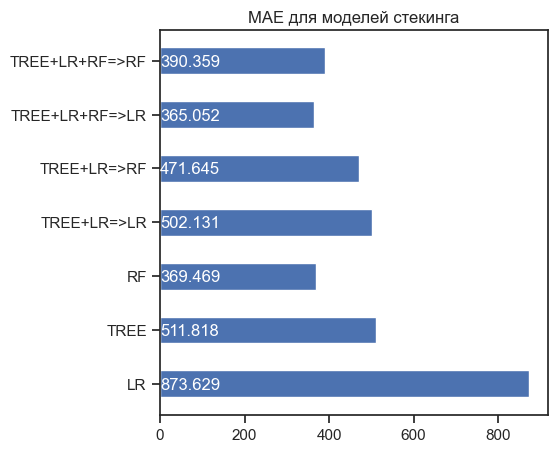

In [35]:
vis_models_quality(array_mae, array_labels, 'MAE для моделей стекинга')

In [37]:
n_clf = MLPRegressor(random_state=1, max_iter=300).fit(x_train, y_train)

C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
y_neuro_predict = n_clf.predict(x_test)
y_neuro_predict

array([ 1.48088859e+03,  6.12751821e+03,  9.77771764e+03,  2.19067873e+03,
        1.84258797e+03,  6.84751724e+03,  1.92034381e+03,  4.24893290e+03,
        6.25679393e+03,  5.62887723e+03,  2.52907682e+02,  9.85943235e+02,
        5.42277122e+03,  1.32381004e+03, -2.09744494e+02,  1.34494212e+03,
        3.60199357e+03,  1.13187953e+03,  1.34477011e+03, -8.44139132e+01,
        1.12328299e+03,  9.19526665e+03,  8.80085214e+03,  1.06714025e+03,
        6.87685441e+02,  1.09924583e+04,  4.71496489e+03,  7.90009764e+02,
        5.40242557e+03,  2.60590476e+02,  1.12331630e+04,  7.67036389e+03,
        7.32822835e+03,  6.96570632e+03,  9.03390817e+03,  9.19432222e+03,
        5.66258770e+03, -1.12738853e+02,  9.62581434e+02,  4.04769822e+03,
        6.06567998e+02,  2.37158222e+02,  5.38188376e+03,  2.88765612e+03,
        1.19109810e+03,  8.43773757e+03,  1.42940966e+03,  5.44765685e+03,
        1.98114999e+03,  6.27643190e+03,  4.17647873e+03,  1.70851659e+03,
        3.82353210e+03,  

In [39]:
r2_score(y_test,y_neuro_predict )

0.7870251046130434

In [41]:
mean_squared_error(y_test,y_neuro_predict )

3446905.5760424566

In [42]:
mean_absolute_error(y_test,y_neuro_predict )

1182.726485302195

In [45]:
model = gmdh.Regressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
result = mean_absolute_error(y_test, y_pred)
print(model)
print('MAE={}'.format(result))


train layer0 in 0.04 sec
train layer1 in 0.14 sec
train layer2 in 0.15 sec
train layer3 in 0.14 sec
train layer4 in 0.15 sec
train layer5 in 0.14 sec
train layer6 in 0.15 sec
train layer7 in 0.23 sec
train layer8 in 0.14 sec
Self-organizing deep learning polynomial neural network
MAE=719.4546590482397


In [46]:
model = gmdh.Regressor(ref_functions=('linear_cov', 'quadratic', 'cubic', 'linear'))
model.fit(x_train, y_train, validation_data=(x_test, y_test))
y_pred = model.predict(x_test)
result = mean_absolute_error(y_test, y_pred)
print(model)
print('MAE={}'.format(result))

train layer0 in 0.38 sec
train layer1 in 1.25 sec
train layer2 in 1.24 sec
train layer3 in 1.28 sec
train layer4 in 1.23 sec
train layer5 in 1.22 sec
train layer6 in 1.20 sec
train layer7 in 1.20 sec
train layer8 in 1.26 sec
train layer9 in 1.26 sec
train layer10 in 1.30 sec
train layer11 in 1.31 sec
Self-organizing deep learning polynomial neural network
MAE=671.7219898181655


In [47]:
array_labels2 = ['GMDH_1', 'GMDH_2']
array_mae2 = [719.4546590482397, 671.7219898181655]

In [48]:
model_gb = GradientBoostingRegressor()
model_gb.fit(x_train, y_train)
y_pred_gb = model.predict(x_test)
result_gb = mean_absolute_error(y_test, y_pred)

array_labels2 = array_labels2 + ['GB']
array_mae2 = array_mae2 + [result_gb]

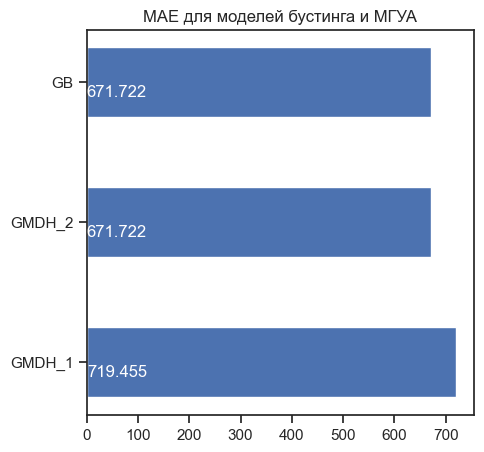

In [49]:
vis_models_quality(array_mae2, array_labels2, 'MAE для моделей бустинга и МГУА')